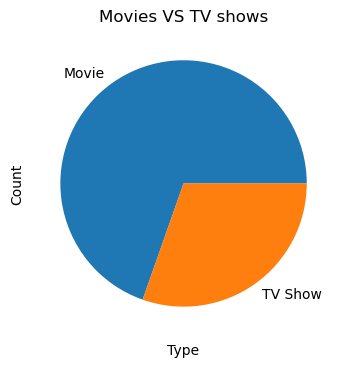

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv(r"E:\ML\netflix_titles.csv")
# 1. Fill missing values
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
# 2. Clean country: keep only first country
df['country'] = df['country'].apply(lambda x: x.split(",")[0].strip())
# 3. Extract numeric duration
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float)
# 4. Clean genres
df['listed_in'] = df['listed_in'].str.lower().str.strip()
# print("Country sample:", df['country'].head(10).tolist())
# print("Duration num sample:", df['duration_num'].head(10).tolist())
# print("Genres sample:", df['listed_in'].head(10).tolist())
df['type'].value_counts().plot(kind='pie',figsize=(6,4))
plt.title("Movies VS TV shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
           

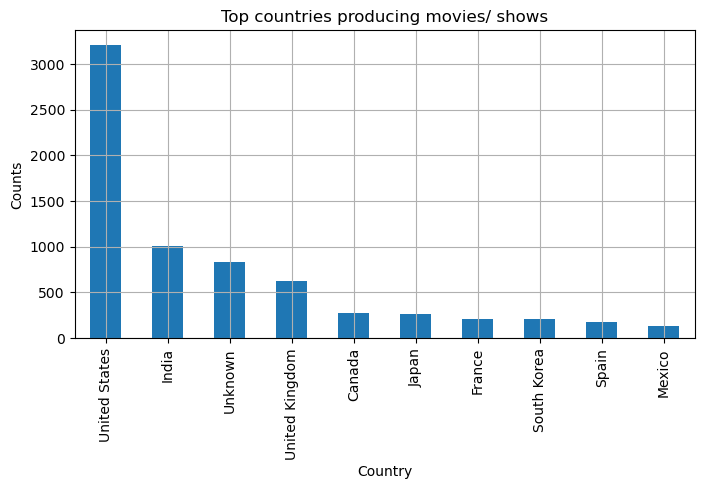

In [4]:
df['country'].value_counts().head(10).plot(kind='bar',figsize=(8,4),grid=True)
plt.title("Top countries producing movies/ shows")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.show()


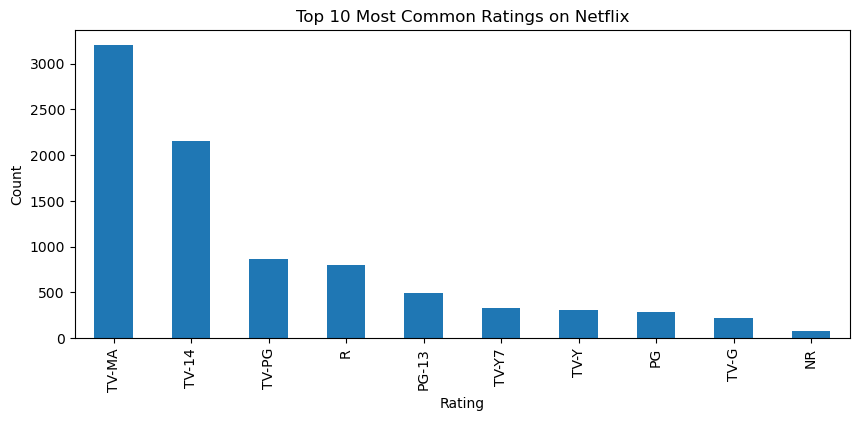

In [7]:
df['rating'].value_counts().head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Most Common Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [8]:
from collections import Counter
genre_list = df['listed_in'].str.split(', ')
all_genres = []
for genres in genre_list:
    all_genres.extend(genres)
genre_counts = Counter(all_genres)
genre_counts.most_common(10)


[('international movies', 2752),
 ('dramas', 2427),
 ('comedies', 1674),
 ('international tv shows', 1351),
 ('documentaries', 869),
 ('action & adventure', 859),
 ('tv dramas', 763),
 ('independent movies', 756),
 ('children & family movies', 641),
 ('romantic movies', 616)]

release_year
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


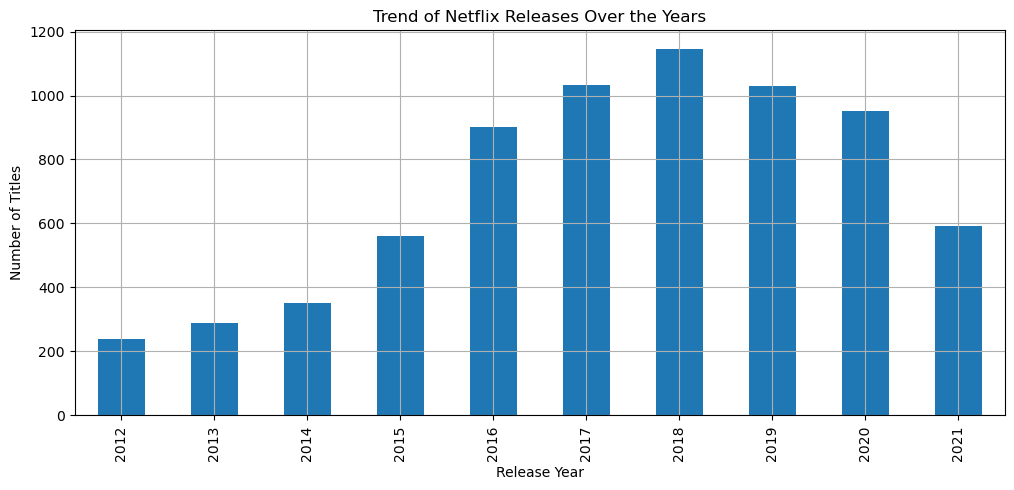

In [23]:
year_counts = df['release_year'].value_counts().head(10).sort_index()
print(year_counts)
plt.figure(figsize=(12,5))
year_counts.plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Trend of Netflix Releases Over the Years")
plt.grid(True)
plt.show()


In [24]:
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
def clean_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text
df["clean_description"] = df["description"].astype(str).apply(clean_text)
df[["description", "clean_description"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,description,clean_description
0,"As her father nears the end of his life, filmm...",father nears end life filmmaker kirsten johnso...
1,"After crossing paths at a party, a Cape Town t...",crossing paths party cape town teen sets prove...
2,To protect his family from a powerful drug lor...,protect family powerful drug lord skilled thie...
3,"Feuds, flirtations and toilet talk go down amo...",feuds flirtations toilet talk go among incarce...
4,In a city of coaching centers known to train I...,city coaching centers known train india’s fine...


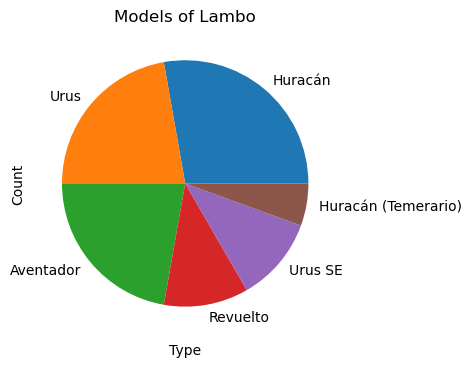

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"E:\projects\lamborghini_sales_2020_2025.csv")
df['Model'].value_counts().plot(kind='pie',figsize=(6,4))
plt.title("Models of Lambo")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
           


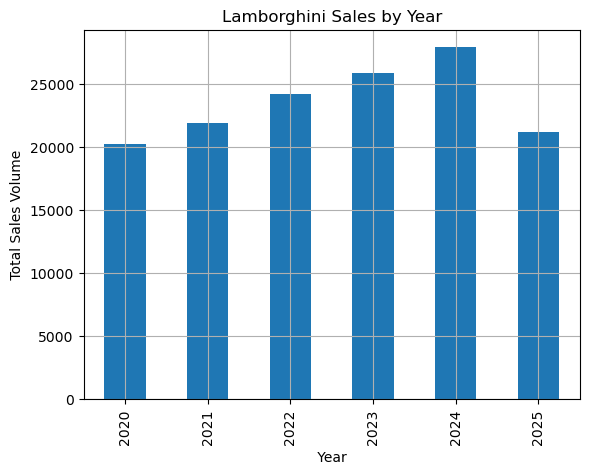

In [25]:
sales_year=df.groupby("Year")["Sales Volume"].sum()
plt.figure()
sales_year.plot(kind="bar",grid=True)
plt.title("Lamborghini Sales by Year")
plt.xlabel(" Year ")
plt.ylabel(" Total Sales Volume ")
plt.show()


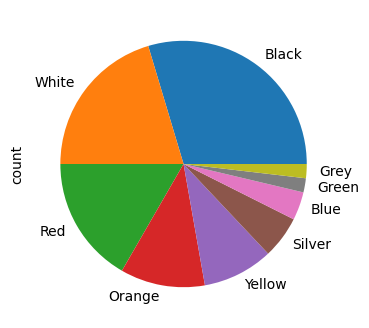

<Figure size 640x480 with 0 Axes>

In [29]:
df['Color'].value_counts().plot(kind='pie',figsize=(6,4))
plt.figure()
plt.show()

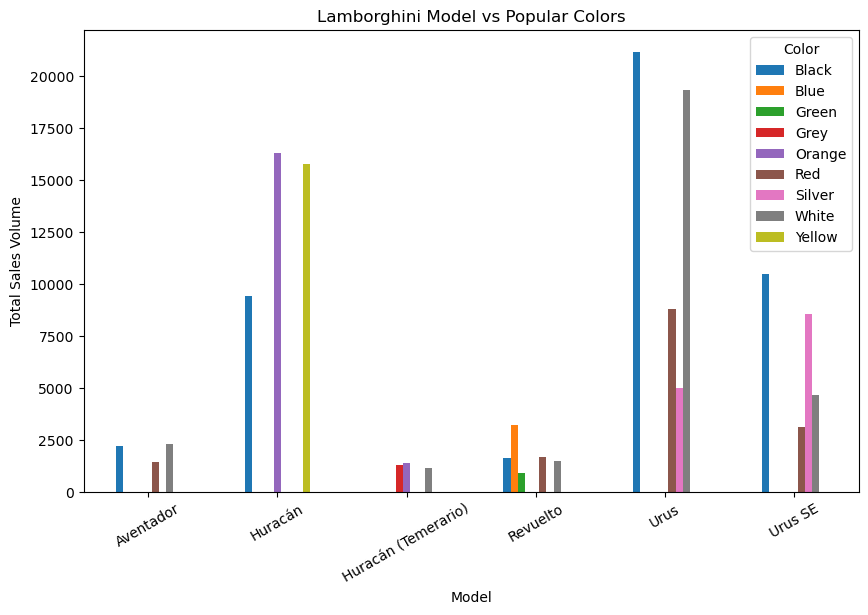

In [34]:
model_colour=df.groupby(["Model","Color"])["Sales Volume"].sum().unstack()
model_colour.plot(kind="bar", figsize=(10,6))
plt.title("Lamborghini Model vs Popular Colors")
plt.xlabel("Model")
plt.ylabel("Total Sales Volume")
plt.xticks(rotation=30)
plt.show()

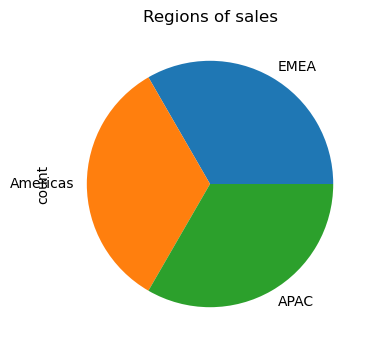

In [39]:
df["Region"].value_counts().plot(kind='pie',figsize=(6,4))
plt.title("Regions of sales")
plt.show()

Year
2020    20250
2021    21925
2022    24243
2023    25838
2024    27918
2025    21200
Name: Sales Volume, dtype: int64


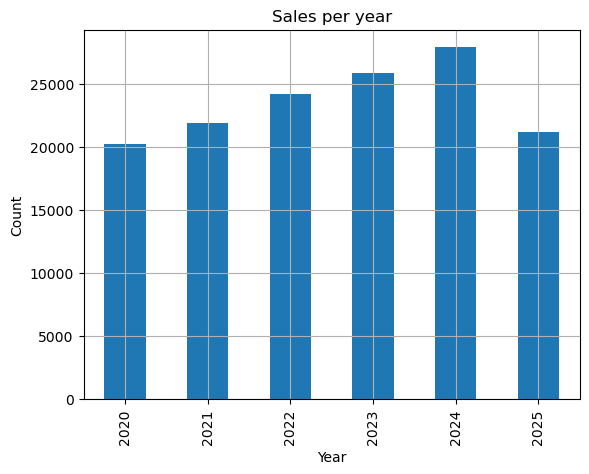

In [47]:
year_counts=df.groupby("Year")["Sales Volume"].sum()
print(year_counts)
year_counts.plot(kind="bar",grid=True)
plt.title("Sales per year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
          

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"E:\projects\lamborghini_sales_2020_2025.csv")
sales_by_year=df.groupby("Year")["Sales Volume"].sum().reset_index()
X = sales_by_year[['Year']]
y = sales_by_year['Sales Volume']
model = LinearRegression()
model.fit(X, y)
pred_2026=model.predict([[2026]])
pred_2026_rounded = int(round(pred_2026[0]))
print(sales_by_year)


   Year  Sales Volume
0  2020         20250
1  2021         21925
2  2022         24243
3  2023         25838
4  2024         27918
5  2025         21200
Predicted sales for 2026: 25995


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv(r"E:\projects\lamborghini_sales_2020_2025.csv")

# Aggregate sales per year per model
sales_by_year = (df.groupby(["Year","Model"])["Sales Volume"] .sum() .reset_index())
print(sales_by_year)
# -------- URUS MODEL --------
urus_data = sales_by_year[sales_by_year["Model"] == "Urus"]
X = urus_data[['Year']]
y = urus_data['Sales Volume']

urus_model = LinearRegression()
urus_model.fit(X, y)
pred_urus_2026 = int(round(urus_model.predict([[2026]])[0]))

# -------- HURACÁN MODEL --------
huracan_data = sales_by_year[sales_by_year["Model"] == "Huracán"]
X = huracan_data[['Year']]
y = huracan_data['Sales Volume']

huracan_model = LinearRegression()
huracan_model.fit(X, y)
pred_huracan_2026 = int(round(huracan_model.predict([[2026]])[0]))

# -------- AVENTADOR MODEL --------
aventador_data = sales_by_year[sales_by_year["Model"] == "Aventador"]
X = aventador_data[['Year']]
y = aventador_data['Sales Volume']

aventador_model = LinearRegression()
aventador_model.fit(X, y)
pred_aventador_2026 = int(round(aventador_model.predict([[2026]])[0]))


# --------  Revuelto MODEL --------
revuelto_data = sales_by_year[sales_by_year["Model"] == "Revuelto"]
X = revuelto_data[['Year']]
y = revuelto_data['Sales Volume']

revuelto_model = LinearRegression()
revuelto_model.fit(X, y)
pred_revuelto_2026 = int(round(revuelto_model.predict([[2026]])[0]))
# -------- FINAL RESULTS --------
print("\nPredicted Sales for 2026:")
print("Urus:", pred_urus_2026)
print("Huracán:", pred_huracan_2026)
print("Aventador:", pred_aventador_2026)
print(" Revuelto:",pred_revuelto_2026)


    Year                Model  Sales Volume
0   2020            Aventador          1650
1   2020              Huracán          6600
2   2020                 Urus         12000
3   2021            Aventador          2118
4   2021              Huracán          6806
5   2021                 Urus         13001
6   2022            Aventador          2013
7   2022              Huracán          8313
8   2022                 Urus         13917
9   2023            Aventador           189
10  2023              Huracán         10262
11  2023                 Urus         15387
12  2024              Huracán          9500
13  2024             Revuelto          3806
14  2024              Urus SE         14612
15  2025  Huracán (Temerario)          3850
16  2025             Revuelto          5150
17  2025              Urus SE         12200

Predicted Sales for 2026:
Urus: 18561
Huracán: 11999
Aventador: -527
 Revuelto: 6494


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
